## 金融风控实战—模型可解释之shap
https://blog.csdn.net/Grateful_Dead424/article/details/123978572?spm=1001.2014.3001.5502


In [8]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [6]:
import xgboost


In [7]:
import pandas as pd
import numpy as np
#混淆矩阵计算
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [9]:
readFileName="D:\GitHub\Datacastle\Credit_risk_engine_samples\lending club smote\data_Q5_filter.xlsx"
#读取excel
data=pd.read_excel(readFileName)
X=data.loc[:,"installment":"emp_length"]
y=data["target"]
train_x, test_x, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

model = xgboost.XGBClassifier(eval_metric=['logloss','auc','error'],use_label_encoder=False)
model.fit(train_x,y_train)
#XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1,
#              eval_metric=['logloss', 'auc', 'error'], gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
#              min_child_weight=1, missing=nan, monotone_constraints='()',
#              n_estimators=100,n_jobs=8,num_parallel_tree=1,random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
#              tree_method='exact', use_label_encoder=False,
#              validate_parameters=1, verbosity=None)


d:\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['logloss', 'auc', 'error'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

## shap.plots.waterfall瀑布图-展示单个用户变量影响

***shap.explainer***:  

This is the primary explainer interface for the SHAP library. It takes any combination of a model and masker and returns a callable subclass object that implements the particular estimation algorithm that was chosen.  

这是 SHAP 库的主要解释器接口。它采用模型和掩码的任意组合，并返回一个可调用的子类对象，该对象实现所选的特定估计算法。


In [11]:
import shap
shap.initjs()  # notebook环境下，加载用于可视化的JS代码
explainer1 = shap.Explainer(model)
shap_values1 = explainer1(X)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [12]:
shap_values1


.values =
array([[ 3.09570432e-01,  5.04659355e-01, -3.20256293e-01, ...,
        -2.80919433e-01, -2.62501031e-01,  1.11294255e-01],
       [-3.94111037e+00,  2.30321527e+00,  1.76202989e+00, ...,
         2.93040695e-03,  1.37306511e-01,  9.41589251e-02],
       [-4.36109416e-02,  1.03904581e+00,  1.63607702e-01, ...,
        -6.09022984e-03, -4.94604856e-02, -3.20238573e-03],
       ...,
       [-3.68644857e+00, -5.88111699e-01,  4.71443892e-01, ...,
        -1.13774076e-01, -9.59491730e-03, -6.76392615e-02],
       [-8.54758203e-01, -9.37955379e-01, -2.24733397e-01, ...,
        -9.56623256e-02,  1.48578480e-01,  2.13949457e-01],
       [-9.35107529e-01, -5.12626350e-01,  5.44724166e-02, ...,
        -4.74351011e-02,  1.33608654e-01, -1.75591245e-01]], dtype=float32)

.base_values =
array([-4.8443294, -4.8443294, -4.8443294, ..., -4.8443294, -4.8443294,
       -4.8443294], dtype=float32)

.data =
array([[3.24230e+02, 4.78340e+02, 3.24230e+02, ..., 1.58000e+02,
        1.00000e+00, 

In [13]:
shap_values1[0]


.values =
array([ 0.30957043,  0.50465935, -0.3202563 ,  0.64397925, -0.77688795,
        0.6932195 ,  1.0683402 , -0.01740288, -0.1445192 , -0.4914697 ,
       -0.1512026 ,  0.03878627, -0.28091943, -0.26250103,  0.11129425],
      dtype=float32)

.base_values =
-4.8443294

.data =
array([3.2423e+02, 4.7834e+02, 3.2423e+02, 6.3985e+02, 1.0330e-01,
       6.3985e+02, 1.6151e+02, 2.7500e+02, 6.1500e+00, 2.8000e+05,
       1.7631e+04, 4.6000e+01, 1.5800e+02, 1.0000e+00, 0.0000e+00])

## SHAP瀑布图
可视化第一个预测的解释：

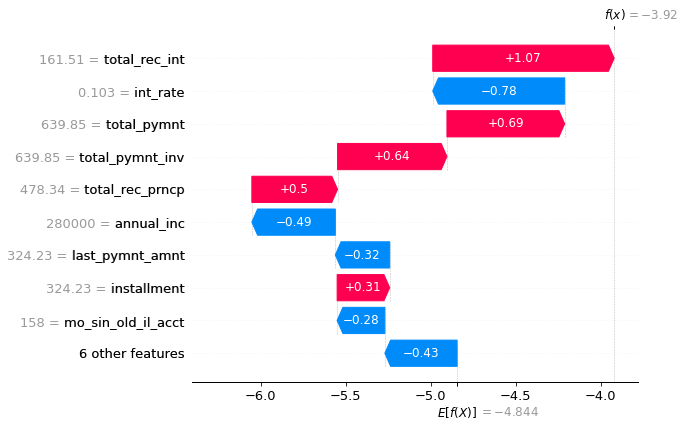

In [14]:
shap.plots.waterfall(shap_values1[0])

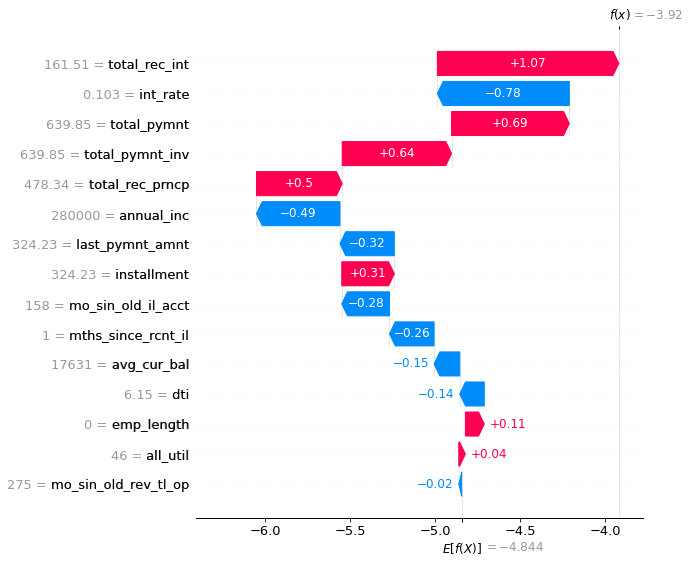

In [16]:
#max_display显示y轴展现变量数量，默认参数是10
shap.plots.waterfall(shap_values1[0],max_display=20)

In [ ]:
由于瀑布图只显示一个样本值的数据，我们无法看到变量的动态变化带来的影响

我们用散点图scatter来观察变量的动态变化

例如installment分期付款金额，整体趋势是这个值越大，shap value更高，坏客户概率越高

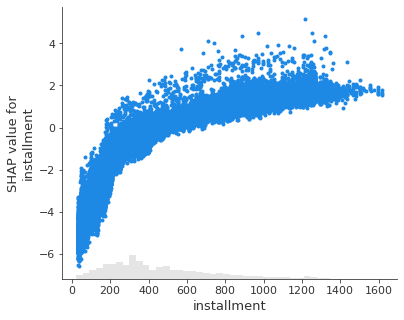

In [17]:
shap.plots.scatter(shap_values1[:,"installment"])

In [ ]:
shap.TreeExplainer
Tree SHAP is a fast and exact method to estimate SHAP values for tree models and ensembles of trees, under several different possible assumptions about feature dependence. It depends on fast C++ implementations either inside an externel model package or in the local compiled C extention.Tree SHAP是一种快速而精确的方法，用于估计树模型和树集合的SHAP值，在关于特征依赖性的几种不同的可能假设下。它依赖于快速的C++实现，既可以在外部模型包内，也可以在本地编译的C扩展中实现。Tree SHAP 方法在数学上等效于对特征的所有可能排序的预测差异进行平均，而不仅仅是由它们在树中的位置指定的排序。只有 Tree SHAP 既一致又准确，这并非巧合。


In [18]:
explainer = shap.TreeExplainer(model)
# 最新版本的shap对于LGBMClassifier得到的shap_values为两个数组的列表，即两个分类的结果，这里使用分类1的结果
shap_values = explainer.shap_values(X)
shap_values

array([[ 3.09570432e-01,  5.04659355e-01, -3.20256293e-01, ...,
        -2.80919433e-01, -2.62501031e-01,  1.11294255e-01],
       [-3.94111037e+00,  2.30321527e+00,  1.76202989e+00, ...,
         2.93040695e-03,  1.37306511e-01,  9.41589251e-02],
       [-4.36109416e-02,  1.03904581e+00,  1.63607702e-01, ...,
        -6.09022984e-03, -4.94604856e-02, -3.20238573e-03],
       ...,
       [-3.68644857e+00, -5.88111699e-01,  4.71443892e-01, ...,
        -1.13774076e-01, -9.59491730e-03, -6.76392615e-02],
       [-8.54758203e-01, -9.37955379e-01, -2.24733397e-01, ...,
        -9.56623256e-02,  1.48578480e-01,  2.13949457e-01],
       [-9.35107529e-01, -5.12626350e-01,  5.44724166e-02, ...,
        -4.74351011e-02,  1.33608654e-01, -1.75591245e-01]], dtype=float32)